# General

In [90]:
# Imports
import numpy as np
import pandas as pd

import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

In [91]:
# Define url to data

pesticides_url = '/content/final_data/insecticide.csv'
rainfall_url = '/content/final_data/rainfall.csv'
temperature_url = '/content/final_data/temp.csv'
yield_url = '/content/final_data/yield.csv'

#Define desired povertial countries

desired_countries_list = pd.read_csv('/content/maub/country-elimination.csv')['Country'].tolist()


In [92]:
# Load data
pesticides_data = pd.read_csv(pesticides_url, sep=',')
rainfall_data = pd.read_csv(rainfall_url, sep=', ')
temperature_data = pd.read_csv(temperature_url, sep=', ')
yield_data = pd.read_csv(yield_url, sep=',')

<ipython-input-92-e353946a88d2>:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  rainfall_data = pd.read_csv(rainfall_url, sep=', ')
<ipython-input-92-e353946a88d2>:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  temperature_data = pd.read_csv(temperature_url, sep=', ')


#Data Preparation


## Rainfall data

In [93]:
rainfall_data

,Rainfall - (MM),Year,Statistics,Country,ISO3
0,55.7448,1901,Jan Average,Afghanistan,AFG
1,13.9480,1901,Feb Average,Afghanistan,AFG
2,43.8464,1901,Mar Average,Afghanistan,AFG
3,26.9610,1901,Apr Average,Afghanistan,AFG
4,52.9579,1901,May Average,Afghanistan,AFG
...,...,...,...,...,...
146997,47.6649,1970,Oct Average,Madagascar,MDG
146998,116.5450,1970,Nov Average,Madagascar,MDG
146999,106.2060,1970,Dec Average,Madagascar,MDG
147000,417.2760,1971,Jan Average,Madagascar,MDG


In [94]:
rainfall_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147002 entries, 0 to 147001
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Rainfall - (MM)  147002 non-null  float64
 1   Year             147002 non-null  int64  
 2   Statistics       147002 non-null  object 
 3   Country          147001 non-null  object 
 4   ISO3             147001 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 5.6+ MB


In [95]:
rainfall_data.describe()

,Rainfall - (MM),Year
count,147002.000000,147002.000000
mean,98.907008,1958.368743
std,103.309103,33.469028
min,0.000000,1901.000000
25%,25.728900,1929.000000
50%,64.358750,1958.000000
75%,139.183500,1987.000000
max,1136.150000,2016.000000


In [96]:
# Number of countries
len(rainfall_data['Country'].unique())

107

In [97]:
# Number of years (1901 - 2016)
len(rainfall_data['Year'].unique())

116

In [98]:
# One year from Afghanistan
rainfall_data.head(12)

,Rainfall - (MM),Year,Statistics,Country,ISO3
0,55.74480,1901,Jan Average,Afghanistan,AFG
1,13.94800,1901,Feb Average,Afghanistan,AFG
2,43.84640,1901,Mar Average,Afghanistan,AFG
3,26.96100,1901,Apr Average,Afghanistan,AFG
4,52.95790,1901,May Average,Afghanistan,AFG
5,16.64650,1901,Jun Average,Afghanistan,AFG
6,7.38656,1901,Jul Average,Afghanistan,AFG
7,0.59306,1901,Aug Average,Afghanistan,AFG
8,4.82593,1901,Sep Average,Afghanistan,AFG
9,11.49720,1901,Oct Average,Afghanistan,AFG


from matplotlib import pyplot as plt
_df_0['Rainfall - (MM)'].plot(kind='hist', bins=20, title='Rainfall - (MM)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['Rainfall - (MM)']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_1.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('Rainfall - (MM)')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Year']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Year'}, axis=1)
              .sort_values('Year', ascending=True))
  xs = counted['Year']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_2.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_3['Rainfall - (MM)'].plot(kind='line', figsize=(8, 4), title='Rainfall - (MM)')
plt.gca().spines[['top', 'right']].set_visible(False)

In [99]:
# Rain data in years for each country
rainfall_df = rainfall_data.groupby(['Year', 'Country', 'ISO3'], as_index=False, axis=0).sum()
rainfall_df

<ipython-input-99-6a65a69a815c>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  rainfall_df = rainfall_data.groupby(['Year', 'Country', 'ISO3'], as_index=False, axis=0).sum()


,Year,Country,ISO3,Rainfall - (MM)
0,1901,Afghanistan,AFG,250.92364
1,1901,Albania,ALB,1244.13740
2,1901,Algeria,DZA,113.45278
3,1901,Andorra,AND,871.31150
4,1901,Angola,AGO,931.01022
...,...,...,...,...
12246,2016,Lithuania,LTU,745.68710
12247,2016,Luxembourg,LUX,951.97170
12248,2016,Macedonia,MKD,781.44978
12249,2016,Republic of Korea,KOR,1346.81770


from matplotlib import pyplot as plt
rainfall_df['Year'].plot(kind='hist', bins=20, title='Year')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
rainfall_df['Rainfall (mm)'].plot(kind='hist', bins=20, title='Rainfall (mm)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
rainfall_df.plot(kind='scatter', x='Year', y='Rainfall (mm)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['Rainfall (mm)']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = rainfall_df.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('Rainfall (mm)')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Year']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Year'}, axis=1)
              .sort_values('Year', ascending=True))
  xs = counted['Year']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = rainfall_df.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
rainfall_df['Year'].plot(kind='line', figsize=(8, 4), title='Year')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
rainfall_df['Rainfall (mm)'].plot(kind='line', figsize=(8, 4), title='Rainfall (mm)')
plt.gca().spines[['top', 'right']].set_visible(False)

## Temperature data

In [100]:
temperature_data

,Temperature - (Celsius),Year,Statistics,Country,ISO3
0,-0.03780,1901,Jan Average,Afghanistan,AFG
1,2.42348,1901,Feb Average,Afghanistan,AFG
2,9.36230,1901,Mar Average,Afghanistan,AFG
3,13.55640,1901,Apr Average,Afghanistan,AFG
4,18.15090,1901,May Average,Afghanistan,AFG
...,...,...,...,...,...
63497,15.74780,1972,Jun Average,Czech Republic,CZE
63498,18.16220,1972,Jul Average,Czech Republic,CZE
63499,16.47980,1972,Aug Average,Czech Republic,CZE
63500,11.05330,1972,Sep Average,Czech Republic,CZE


In [101]:
temperature_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63502 entries, 0 to 63501
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Temperature - (Celsius)  63502 non-null  float64
 1   Year                     63502 non-null  int64  
 2   Statistics               63502 non-null  object 
 3   Country                  63501 non-null  object 
 4   ISO3                     63501 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 2.4+ MB


In [102]:
temperature_data.describe()

,Temperature - (Celsius),Year
count,63502.000000,63502.000000
mean,18.734426,1958.200246
std,9.775073,33.442691
min,-30.167000,1901.000000
25%,13.492525,1929.000000
50%,22.761050,1958.000000
75%,25.517000,1987.000000
max,38.286200,2016.000000


In [103]:
# Number of countries
len(temperature_data['Country'].unique())

47

In [104]:
# Number of years (1901 - 2016)
len(temperature_data['Year'].unique())

116

In [105]:
# One year from Afghanistan
temperature_data.head(12)

,Temperature - (Celsius),Year,Statistics,Country,ISO3
0,-0.03780,1901,Jan Average,Afghanistan,AFG
1,2.42348,1901,Feb Average,Afghanistan,AFG
2,9.36230,1901,Mar Average,Afghanistan,AFG
3,13.55640,1901,Apr Average,Afghanistan,AFG
4,18.15090,1901,May Average,Afghanistan,AFG
5,22.17270,1901,Jun Average,Afghanistan,AFG
6,25.37870,1901,Jul Average,Afghanistan,AFG
7,23.66520,1901,Aug Average,Afghanistan,AFG
8,19.46550,1901,Sep Average,Afghanistan,AFG
9,11.28370,1901,Oct Average,Afghanistan,AFG


In [106]:
# Average temperature data in years for each country
temperature_df =temperature_data.groupby(['Year', 'Country', 'ISO3'], as_index=False, axis=0).mean()
temperature_df

<ipython-input-106-00064c00c0a3>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  temperature_df =temperature_data.groupby(['Year', 'Country', 'ISO3'], as_index=False, axis=0).mean()


,Year,Country,ISO3,Temperature - (Celsius)
0,1901,Afghanistan,AFG,13.172872
1,1901,Albania,ALB,11.030938
2,1901,Algeria,DZA,22.290008
3,1901,Andorra,AND,9.960649
4,1901,Angola,AGO,21.365725
...,...,...,...,...
5287,2016,Cote d'Ivoire,CIV,27.254042
5288,2016,Croatia,HRV,11.911625
5289,2016,Cuba,CUB,26.209958
5290,2016,Cyprus,CYP,20.277917



## Yield data

In [107]:
yield_data

,Domain,Area,Element,Item,Year,Unit,Value
0,Crops,Afghanistan,Yield,Barley,1961,hg/ha,10800
1,Crops,Afghanistan,Yield,Barley,1962,hg/ha,10800
2,Crops,Afghanistan,Yield,Barley,1963,hg/ha,10800
3,Crops,Afghanistan,Yield,Barley,1964,hg/ha,10857
4,Crops,Afghanistan,Yield,Barley,1965,hg/ha,10857
...,...,...,...,...,...,...,...
63686,Crops,Zimbabwe,Yield,Wheat,2015,hg/ha,20486
63687,Crops,Zimbabwe,Yield,Wheat,2016,hg/ha,19013
63688,Crops,Zimbabwe,Yield,Wheat,2017,hg/ha,17542
63689,Crops,Zimbabwe,Yield,Wheat,2018,hg/ha,16379


In [108]:
yield_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63691 entries, 0 to 63690
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Domain   63691 non-null  object
 1   Area     63691 non-null  object
 2   Element  63691 non-null  object
 3   Item     63691 non-null  object
 4   Year     63691 non-null  int64 
 5   Unit     63691 non-null  object
 6   Value    63691 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 3.4+ MB


In [109]:
yield_data.describe()

,Year,Value
count,63691.000000,6.369100e+04
mean,1992.332669,8.581113e+04
std,16.888797,1.008880e+05
min,1961.000000,0.000000e+00
25%,1978.000000,1.770700e+04
50%,1994.000000,4.705900e+04
75%,2007.000000,1.185070e+05
max,2019.000000,2.236842e+06


In [110]:
# Number of countries
len(yield_data['Area'].unique())

203

In [111]:
# Number of years (1961 - 2019)
len(yield_data['Year'].unique())

59

In [112]:
# Remove unnecessary columns
yield_df = yield_data.drop(['Domain', 'Element'], axis=1)
yield_df

,Area,Item,Year,Unit,Value
0,Afghanistan,Barley,1961,hg/ha,10800
1,Afghanistan,Barley,1962,hg/ha,10800
2,Afghanistan,Barley,1963,hg/ha,10800
3,Afghanistan,Barley,1964,hg/ha,10857
4,Afghanistan,Barley,1965,hg/ha,10857
...,...,...,...,...,...
63686,Zimbabwe,Wheat,2015,hg/ha,20486
63687,Zimbabwe,Wheat,2016,hg/ha,19013
63688,Zimbabwe,Wheat,2017,hg/ha,17542
63689,Zimbabwe,Wheat,2018,hg/ha,16379


## Pesticides data

In [113]:
pesticides_data

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,RP,Pesticides Use,8,Albania,5157,Agricultural Use,1309,Insecticides,1990,1990,t,70.00,I,Imputed value
1,RP,Pesticides Use,8,Albania,5157,Agricultural Use,1309,Insecticides,1991,1991,t,70.00,I,Imputed value
2,RP,Pesticides Use,8,Albania,5157,Agricultural Use,1309,Insecticides,1992,1992,t,70.00,I,Imputed value
3,RP,Pesticides Use,8,Albania,5157,Agricultural Use,1309,Insecticides,1993,1993,t,70.00,A,Official figure
4,RP,Pesticides Use,8,Albania,5157,Agricultural Use,1309,Insecticides,1994,1994,t,117.00,A,Official figure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6679,RP,Pesticides Use,716,Zimbabwe,5157,Agricultural Use,1309,Insecticides,2017,2017,t,1092.25,I,Imputed value
6680,RP,Pesticides Use,716,Zimbabwe,5157,Agricultural Use,1309,Insecticides,2018,2018,t,1092.25,I,Imputed value
6681,RP,Pesticides Use,716,Zimbabwe,5157,Agricultural Use,1309,Insecticides,2019,2019,t,1092.25,I,Imputed value
6682,RP,Pesticides Use,716,Zimbabwe,5157,Agricultural Use,1309,Insecticides,2020,2020,t,1092.25,I,Imputed value


In [114]:
pesticides_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6684 entries, 0 to 6683
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       6684 non-null   object 
 1   Domain            6684 non-null   object 
 2   Area Code (M49)   6684 non-null   int64  
 3   Area              6684 non-null   object 
 4   Element Code      6684 non-null   int64  
 5   Element           6684 non-null   object 
 6   Item Code         6684 non-null   int64  
 7   Item              6684 non-null   object 
 8   Year Code         6684 non-null   int64  
 9   Year              6684 non-null   int64  
 10  Unit              6684 non-null   object 
 11  Value             6684 non-null   float64
 12  Flag              6684 non-null   object 
 13  Flag Description  6684 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 731.2+ KB


In [115]:
pesticides_data.describe()

,Area Code (M49),Element Code,Item Code,Year Code,Year,Value
count,6684.000000,6684.0,6684.0,6684.000000,6684.000000,6684.000000
mean,424.864004,5157.0,1309.0,2005.629563,2005.629563,3244.368356
std,250.609400,0.0,0.0,9.181975,9.181975,13533.871147
min,8.000000,5157.0,1309.0,1990.000000,1990.000000,0.000000
25%,204.000000,5157.0,1309.0,1998.000000,1998.000000,21.967500
50%,422.000000,5157.0,1309.0,2006.000000,2006.000000,148.750000
75%,634.000000,5157.0,1309.0,2014.000000,2014.000000,767.000000
max,894.000000,5157.0,1309.0,2021.000000,2021.000000,203482.780000


In [116]:
# Number of countries
len(pesticides_data['Area'].unique())

220

In [117]:
# Number of years (1990 - 2018)
len(pesticides_data['Year'].unique())

32

In [118]:
# Remove unnecessary columns
pesticides_df = pesticides_data.drop(['Domain Code', 'Area Code (M49)', 'Element Code', 'Item Code', 'Year Code', 'Flag', 'Flag Description', 'Domain', 'Element'], axis=1)
pesticides_df

,Area,Item,Year,Unit,Value
0,Albania,Insecticides,1990,t,70.00
1,Albania,Insecticides,1991,t,70.00
2,Albania,Insecticides,1992,t,70.00
3,Albania,Insecticides,1993,t,70.00
4,Albania,Insecticides,1994,t,117.00
...,...,...,...,...,...
6679,Zimbabwe,Insecticides,2017,t,1092.25
6680,Zimbabwe,Insecticides,2018,t,1092.25
6681,Zimbabwe,Insecticides,2019,t,1092.25
6682,Zimbabwe,Insecticides,2020,t,1092.25


## Merging

In [152]:
rainfall_df.rename({'Rainfall - (MM)': 'Rainfall (mm)'}, axis=1, inplace=True)

In [153]:
temperature_df.rename({'Temperature - (Celsius)': 'Temperature (Celsius)'}, axis=1, inplace=True)

In [154]:
yield_df.rename({'Area': 'Country', 'Value': 'Yield (hg/ha)'}, axis=1, inplace=True)

In [155]:
pesticides_df.rename({'Area': 'Country', 'Value': 'Pesticides (tonnes)'}, axis=1, inplace=True)


In [156]:

rain_temp_df = pd.merge(rainfall_df, temperature_df, on=['Country', 'Year', 'ISO3'])
rain_temp_yield_df = pd.merge(rain_temp_df, yield_df, on=['Country', 'Year'])
rain_temp_yield_pest_df = pd.merge(rain_temp_yield_df, pesticides_df, on=['Country', 'Year'])
rain_temp_yield_pest_df.drop('ISO3', axis=1, inplace=True)
data = rain_temp_yield_pest_df[['Year', 'Country', 'Item', 'Rainfall (mm)', 'Temperature (Celsius)', 'Pesticides (tonnes)', 'Yield (hg/ha)']]




In [157]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6438 entries, 0 to 6437
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   6438 non-null   int64  
 1   Country                6438 non-null   object 
 2   Item                   6438 non-null   object 
 3   Rainfall (mm)          6438 non-null   float64
 4   Temperature (Celsius)  6438 non-null   float64
 5   Pesticides (tonnes)    6438 non-null   float64
 6   Yield (hg/ha)          6438 non-null   int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 402.4+ KB


In [158]:
data.describe()

,Year,Rainfall (mm),Temperature (Celsius),Pesticides (tonnes),Yield (hg/ha)
count,6438.000000,6438.000000,6438.000000,6438.000000,6438.000000
mean,2003.429015,1061.095223,16.079906,7407.743549,86281.558248
std,7.656554,739.286012,8.697440,20125.227404,98656.761896
min,1990.000000,18.454360,-7.166322,0.000000,659.000000
25%,1997.000000,528.781160,9.361084,87.000000,20963.500000
50%,2004.000000,812.234500,13.915788,387.560000,44479.000000
75%,2010.000000,1445.311650,24.885792,2101.160000,114861.750000
max,2016.000000,3608.892000,29.139642,116056.200000,792237.000000


In [159]:
# Number of countries
len(data.Country.unique())

36

In [160]:
# Number of years (1990 - 2016)
len(data.Year.unique())

27

# Data Exploration

## Rainfall data

In [55]:
rainfall_df

,Year,Country,ISO3,Rainfall (mm)
0,1901,Afghanistan,AFG,250.92364
1,1901,Albania,ALB,1244.13740
2,1901,Algeria,DZA,113.45278
3,1901,Andorra,AND,871.31150
4,1901,Angola,AGO,931.01022
...,...,...,...,...
12246,2016,Lithuania,LTU,745.68710
12247,2016,Luxembourg,LUX,951.97170
12248,2016,Macedonia,MKD,781.44978
12249,2016,Republic of Korea,KOR,1346.81770


<ipython-input-56-3187dc031a4b>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  rainfall_df.loc[rainfall_df['Country'] == 'Germany'].groupby('Year').mean().plot()


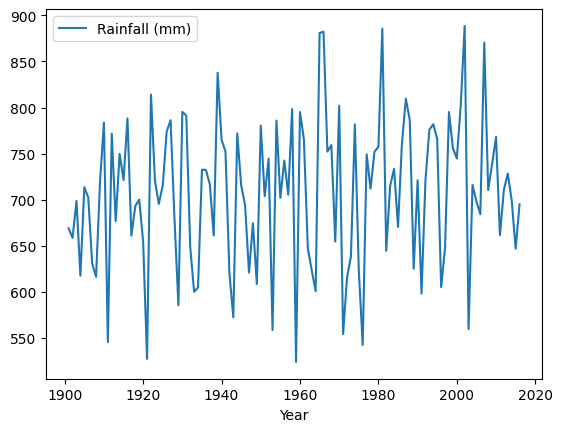

In [56]:
rainfall_df.loc[rainfall_df['Country'] == 'Germany'].groupby('Year').mean().plot()
plt.show()

<ipython-input-185-c460d89ff6ee>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  temp_data = rainfall_df.groupby('Year').mean()


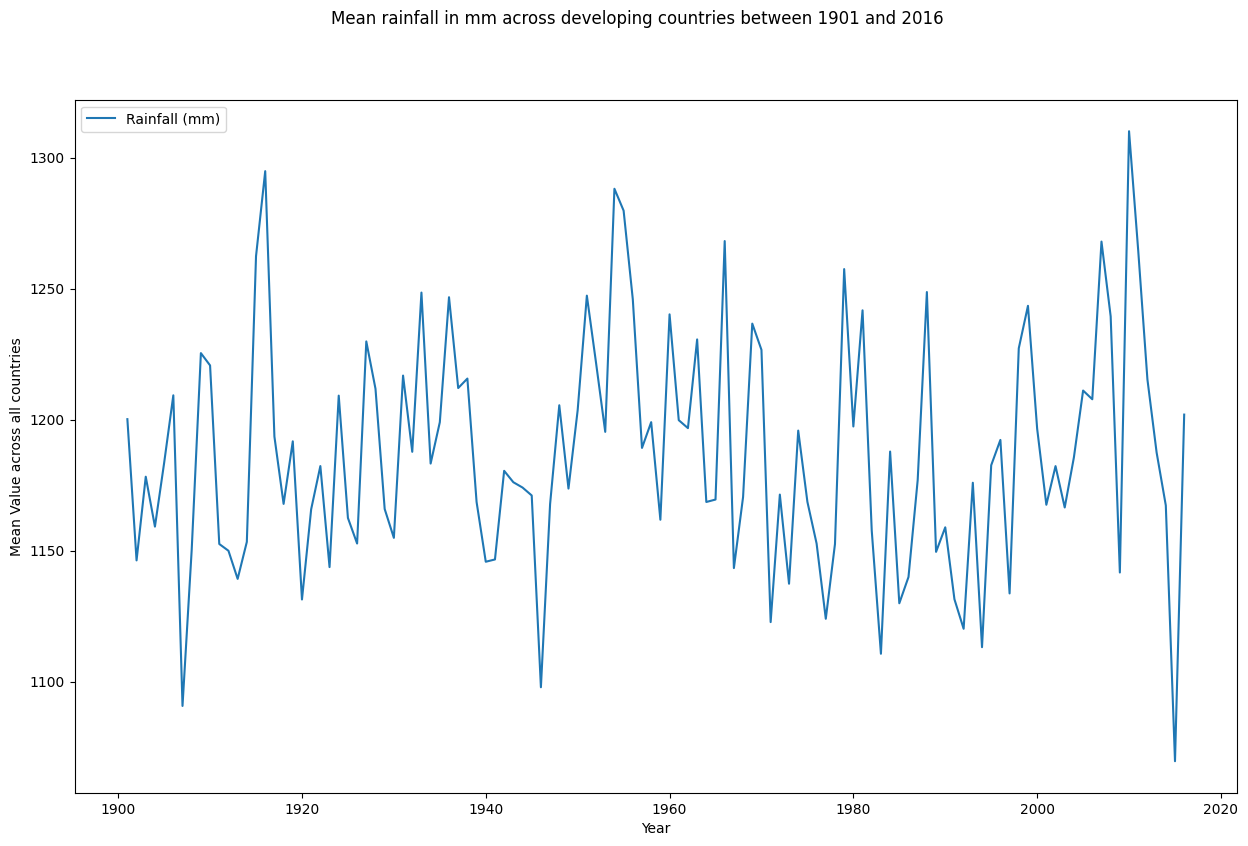

In [185]:
# prepare data
temp_data = rainfall_df.groupby('Year').mean()

# plot data
fig, ax = plt.subplots(figsize=(15,9))
fig.suptitle('Mean rainfall in mm across developing countries between 1901 and 2016')

temp_data.plot(ax=ax)

ax.set_ylabel('Mean Value across all countries')
ax.set_xlabel('Year')

plt.show()

## Temperature data

<ipython-input-58-243d8d7a6fbc>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  temperature_df.loc[temperature_df['Country'] == 'Germany'].groupby('Year').mean().plot()


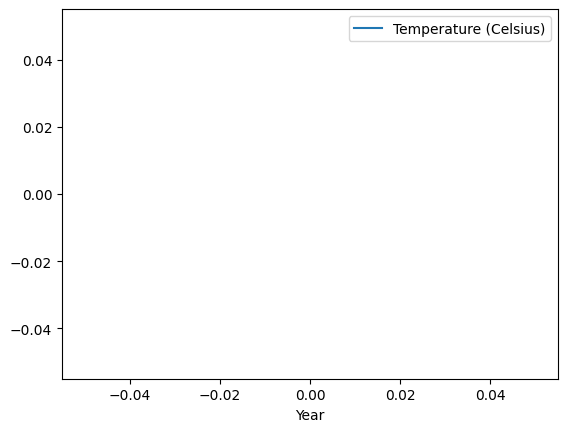

In [58]:
temperature_df.loc[temperature_df['Country'] == 'Germany'].groupby('Year').mean().plot()
plt.show()

<ipython-input-186-ccbeefb6f47f>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  temp_data = temperature_df.groupby('Year').mean()


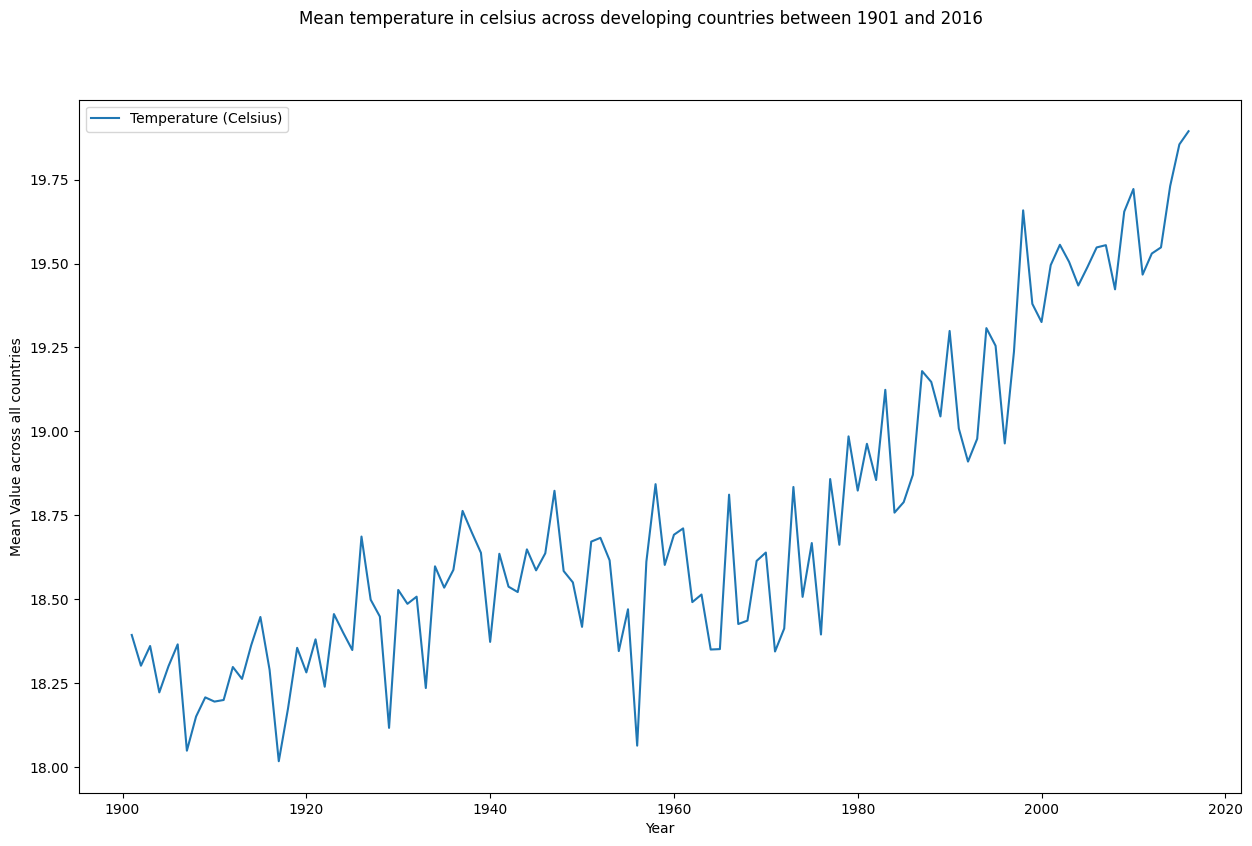

In [186]:
# prepare data
temp_data = temperature_df.groupby('Year').mean()

# plot data
fig, ax = plt.subplots(figsize=(15,9))
fig.suptitle('Mean temperature in celsius across developing countries between 1901 and 2016')

temp_data.plot(ax=ax)

ax.set_ylabel('Mean Value across all countries')
ax.set_xlabel('Year')

plt.show()

## Yield data

<ipython-input-187-c28d8a59a7de>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  yield_mean = yield_data.groupby(['Year', 'Item']).mean()


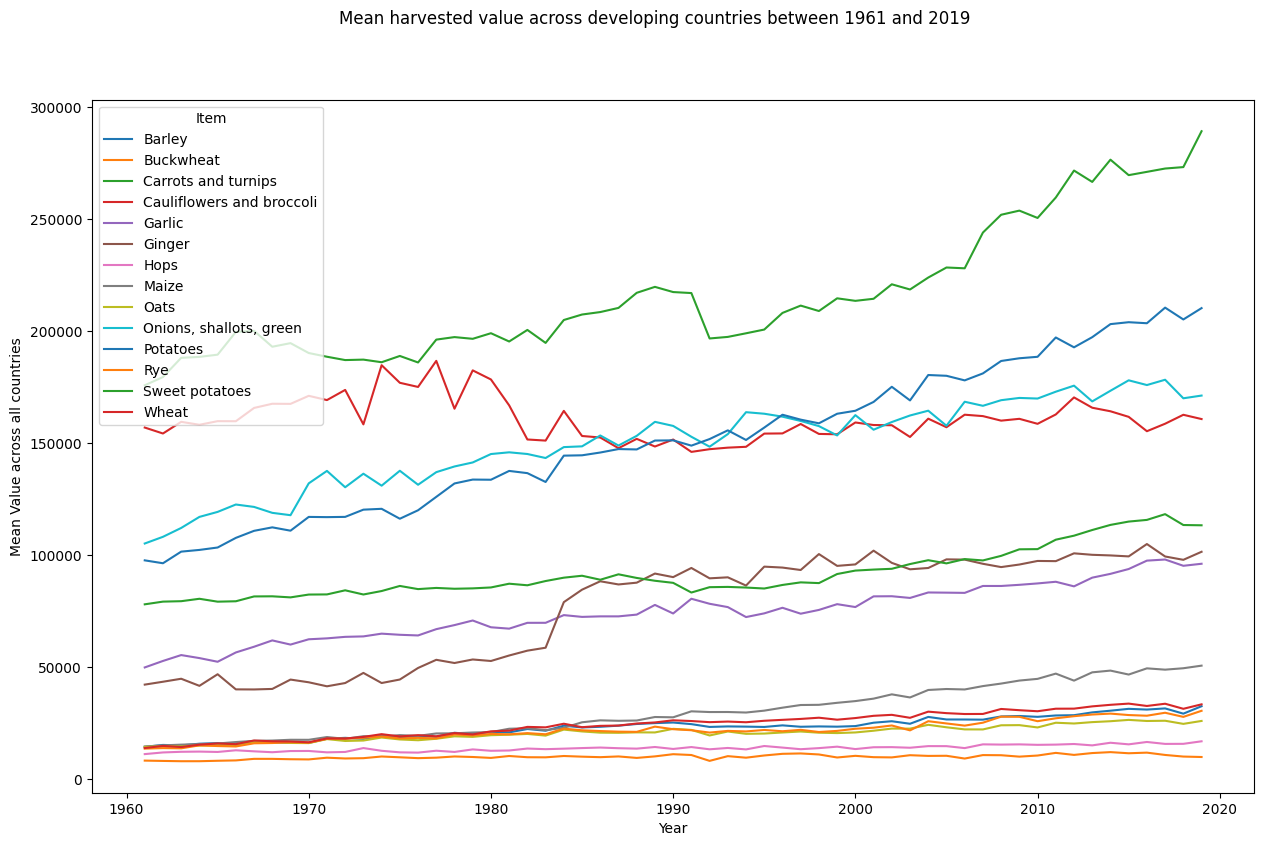

In [187]:
# prepare data
yield_mean = yield_data.groupby(['Year', 'Item']).mean()

# plot data
fig, ax = plt.subplots(figsize=(15,9))
fig.suptitle('Mean harvested value across developing countries between 1961 and 2019')

yield_mean['Value'].unstack().plot(ax=ax)

ax.set_ylabel('Mean Value across all countries')
ax.set_xlabel('Year')

plt.show()

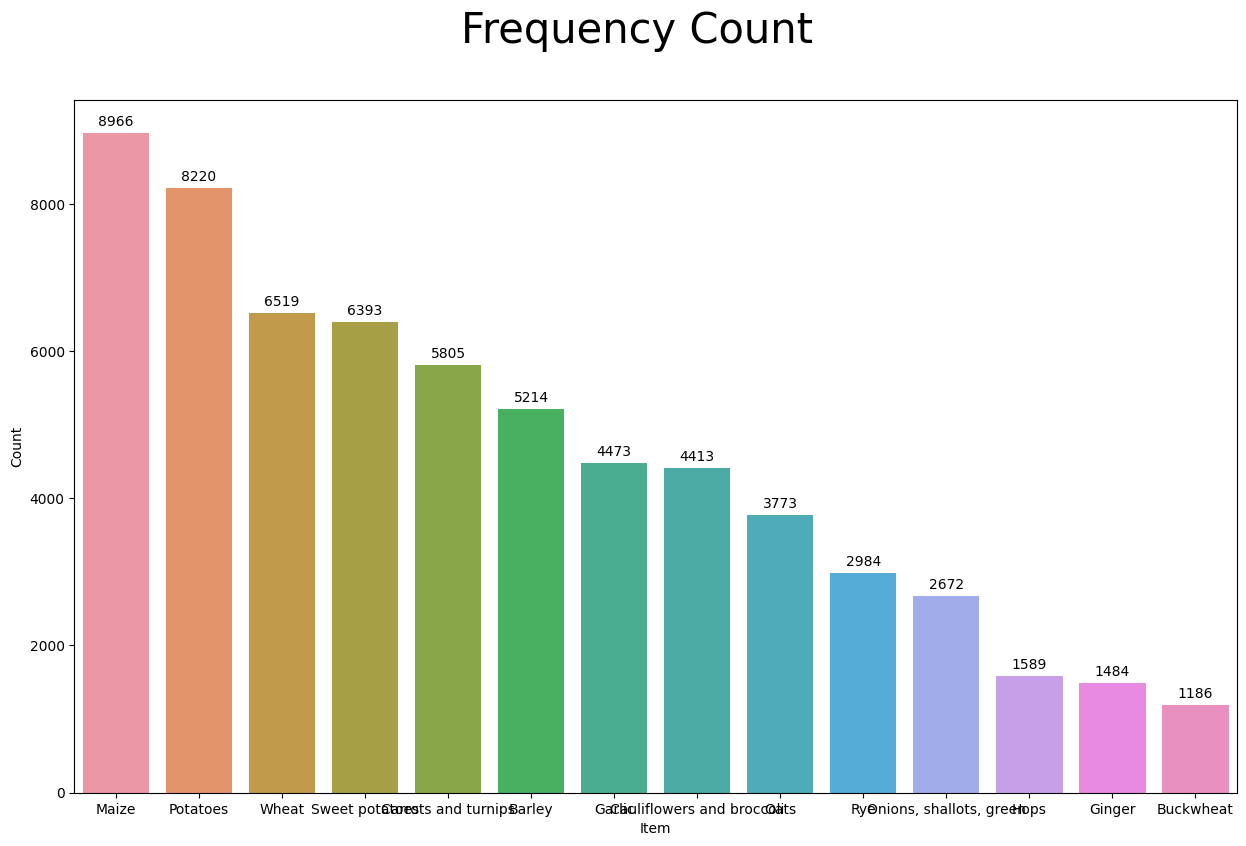

In [188]:
fig, axs = plt.subplots(1,1, figsize=(15,9))
fig.suptitle('Frequency Count', size=30)

temp_df = yield_data['Item'].value_counts().to_frame().reset_index()
g = sns.barplot(x='index', y='Item', data=temp_df, orient='v', ax=axs)

for index, row in temp_df.iterrows():
    g.text(row.name,row.Item + 100, row.Item, color='black', ha="center")

axs.set_xlabel('Item')
axs.set_ylabel('Count')

fig.show()

## Pesticide data

In [62]:
pesticides_df.loc[temperature_df['Country'] == 'Germany'].groupby('Year').mean().plot()
plt.show()

IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

<ipython-input-189-8e6130b0d728>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  temp_data = pesticides_df.groupby('Year').mean()


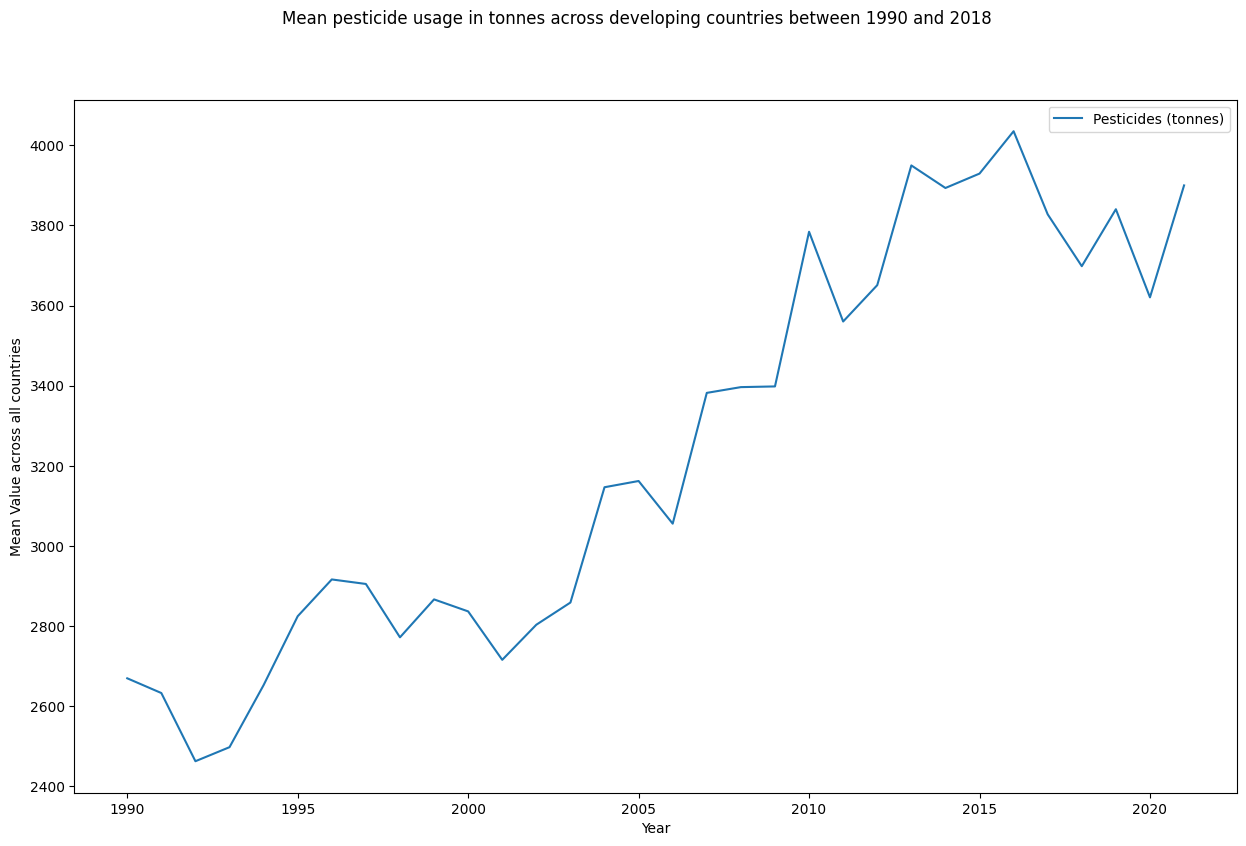

In [189]:
# prepare data
temp_data = pesticides_df.groupby('Year').mean()

# plot data
fig, ax = plt.subplots(figsize=(15,9))
fig.suptitle('Mean pesticide usage in tonnes across developing countries between 1990 and 2018')

temp_data.plot(ax=ax)

ax.set_ylabel('Mean Value across all countries')
ax.set_xlabel('Year')

plt.show()

## Merged data

<ipython-input-161-5eb7488522f7>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  temp_data = data.groupby(['Year', 'Item']).mean()


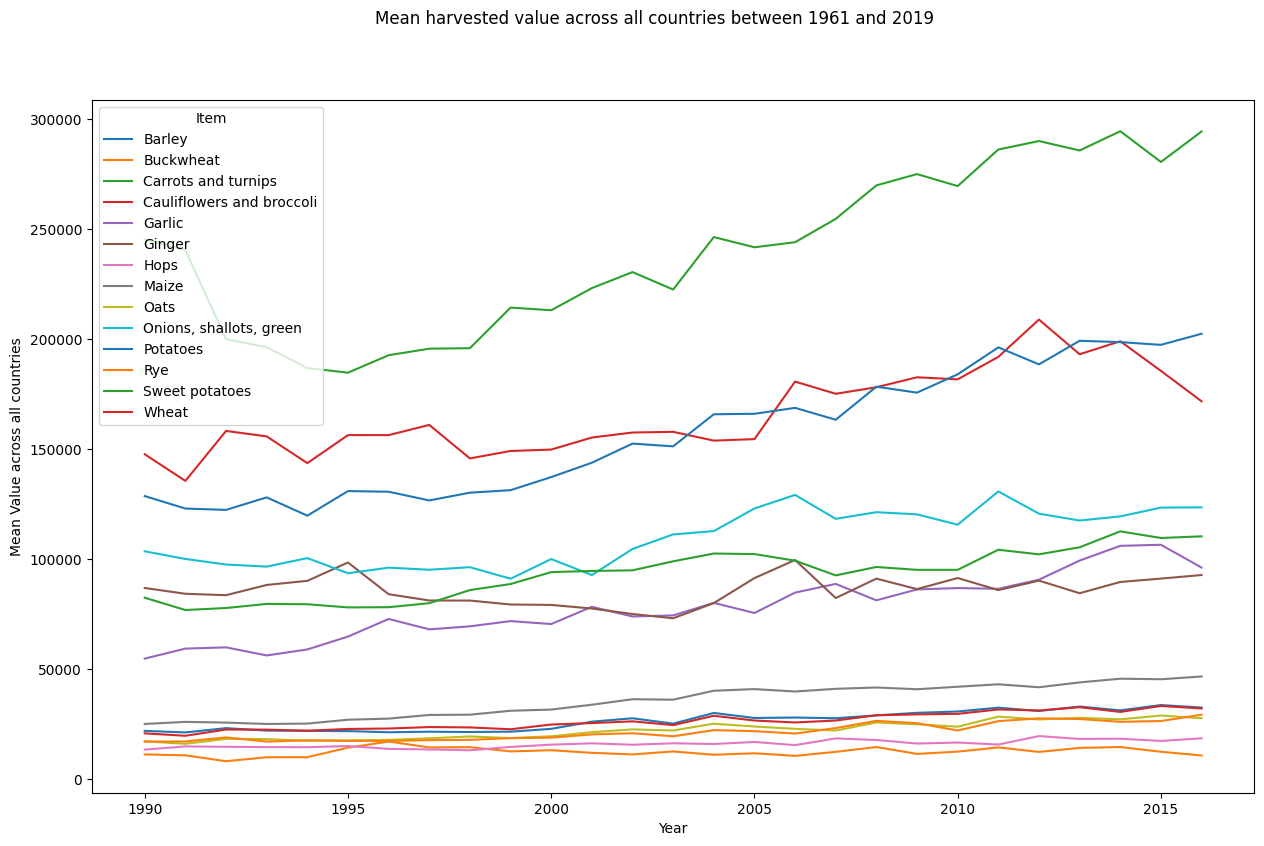

In [161]:
# prepare data
temp_data = data.groupby(['Year', 'Item']).mean()

# plot data
fig, ax = plt.subplots(figsize=(15,9))
fig.suptitle('Mean harvested value across all countries between 1961 and 2019')

temp_data['Yield (hg/ha)'].unstack().plot(ax=ax)

ax.set_ylabel('Mean Value across all countries')
ax.set_xlabel('Year')

plt.show()

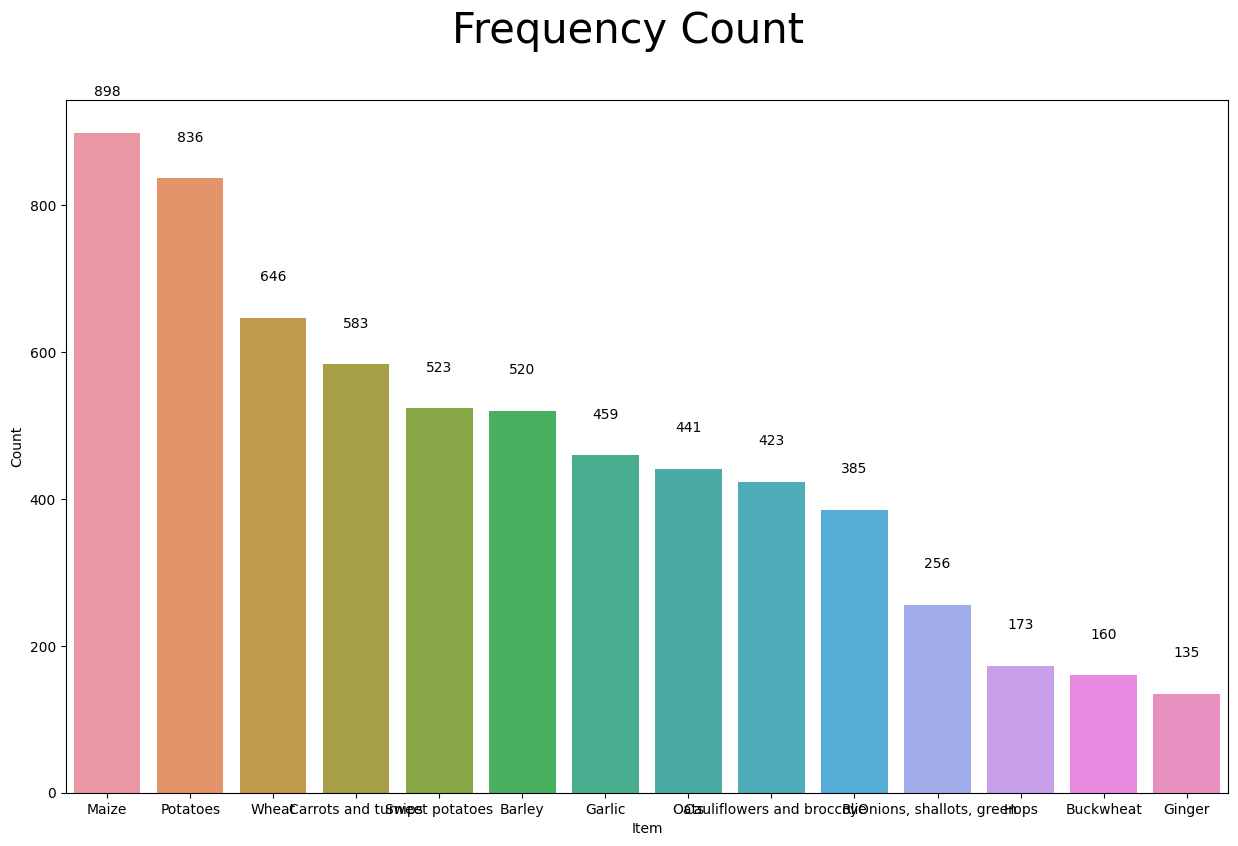

In [162]:
fig, axs = plt.subplots(1,1, figsize=(15,9))
fig.suptitle('Frequency Count', size=30)

temp_df = data['Item'].value_counts().to_frame().reset_index()
g = sns.barplot(x='index', y='Item', data=temp_df, orient='v', ax=axs)

for index, row in temp_df.iterrows():
    g.text(row.name,row.Item + 50, row.Item, color='black', ha="center")

axs.set_xlabel('Item')
axs.set_ylabel('Count')

fig.show()

<ipython-input-190-4b9532546031>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


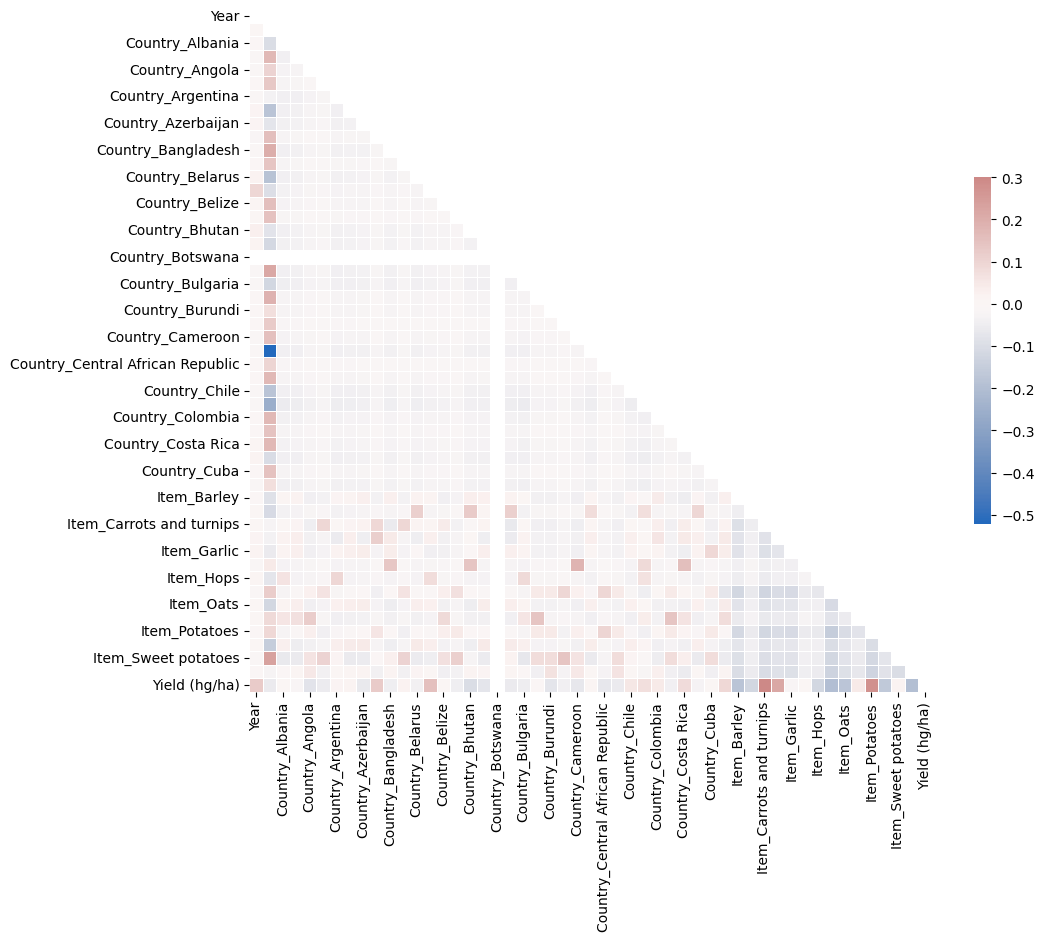

In [190]:
corr = data.select_dtypes(include=[np.number]).corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.palette="vlag"

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

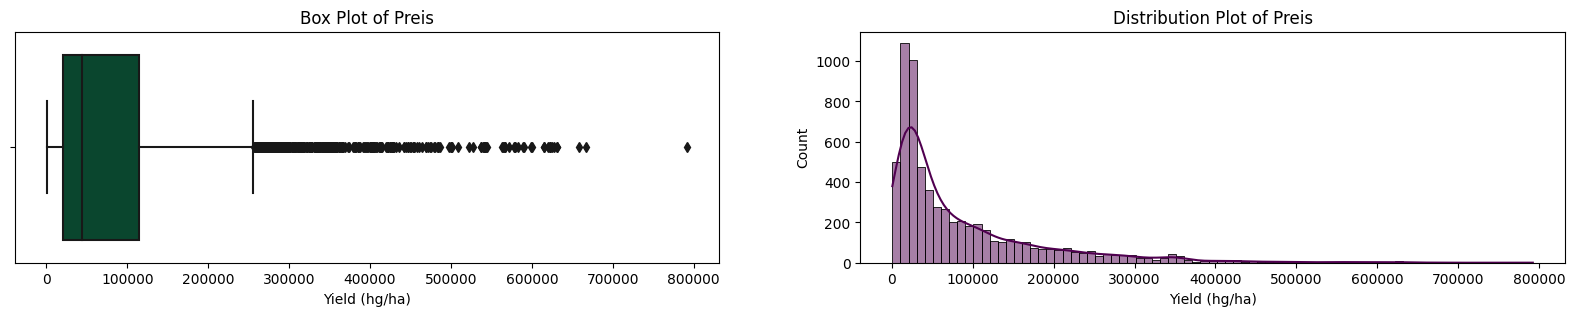

In [164]:
plt.figure(figsize=(20,3))

plt.subplot(1,2,1)
sns.boxplot(x=data['Yield (hg/ha)'],color='#005030')
plt.title(f'Box Plot of Preis')

plt.subplot(1,2,2)
sns.histplot(x=data['Yield (hg/ha)'], color='#500050', kde=True)
plt.title(f'Distribution Plot of Preis')
plt.show()

# Data Preprocessing

## One Hot Encoding

In [165]:
data.shape

(6438, 7)

In [166]:
from sklearn.preprocessing import OneHotEncoder

df_onehot = pd.get_dummies(data, columns=['Country', 'Item'], prefix=['Country', 'Item'])
data = df_onehot.loc[:, df_onehot.columns != 'Yield (hg/ha)']
data['Yield (hg/ha)'] = df_onehot['Yield (hg/ha)']

In [167]:
data.shape

(6438, 55)

## Backward Elimination

In [168]:
data.shape

(6438, 55)

In [169]:
import statsmodels.api as sm

y = data['Yield (hg/ha)']
X = data.drop('Yield (hg/ha)', axis=1)

cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p = []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:], index = cols)
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break

data = data[cols]
data.insert(len(data.columns), 'Yield (hg/ha)', y)

In [170]:
data.shape

(6438, 51)

## Removing of Outliers

In [171]:
data.shape

(6438, 51)

In [172]:
from scipy import stats

y = data['Yield (hg/ha)']
X = data.drop('Yield (hg/ha)', axis=1)

z_scores = stats.zscore(X)
abs_z_scores = np.abs(z_scores)

filtered_entries = (abs_z_scores < 11).all(axis=1)
X = X[filtered_entries]

X.insert(len(X.columns), 'Yield (hg/ha)', y)
data = X

In [173]:
data.shape

(6392, 51)

## Feature Scaling

In [174]:
data.shape

(6392, 51)

In [175]:
from sklearn.preprocessing import MinMaxScaler

y = data['Yield (hg/ha)']
X = data.drop('Yield (hg/ha)', axis=1)

scaler = MinMaxScaler()
data_without_yield = pd.DataFrame(scaler.fit_transform(X), index=y.index)
data_without_yield.columns = X.columns
data_without_yield.insert(len(data_without_yield.columns), 'Yield (hg/ha)', y)

data = data_without_yield

In [176]:
data.shape

(6392, 51)

# Modeling

In [177]:
y = data['Yield (hg/ha)']
X = data.drop('Yield (hg/ha)', axis=1)

In [178]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [179]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [180]:
def plot_regression_results(ax, y_test, y_pred, title, estimated_time, scores):

  # linear least-squares
  slope, intercept, rvalue, pvalue, stderr = linregress(y_test, y_pred)
  ax.plot([y_test.min(), y_test.max()], [intercept+y_test.min()*slope, intercept+y_test.max()*slope], '--r')

  ax.scatter(y_test, y_pred, alpha=0.7)

  # Anzeigen der Werte in einer Box
  extra = plt.Rectangle((0, 0), 0, 0, fc="w", fill=False,
                          edgecolor='none', linewidth=0)
  ax.legend([extra], [scores], loc='upper left')

  ax.set_xlabel('Actual values in tonnes')
  ax.set_ylabel('Predictes values in tonnes')
  ax.set_title('{}\nTrained in {:.2f} Milliseconds'.format(name, estimated_time*1000))

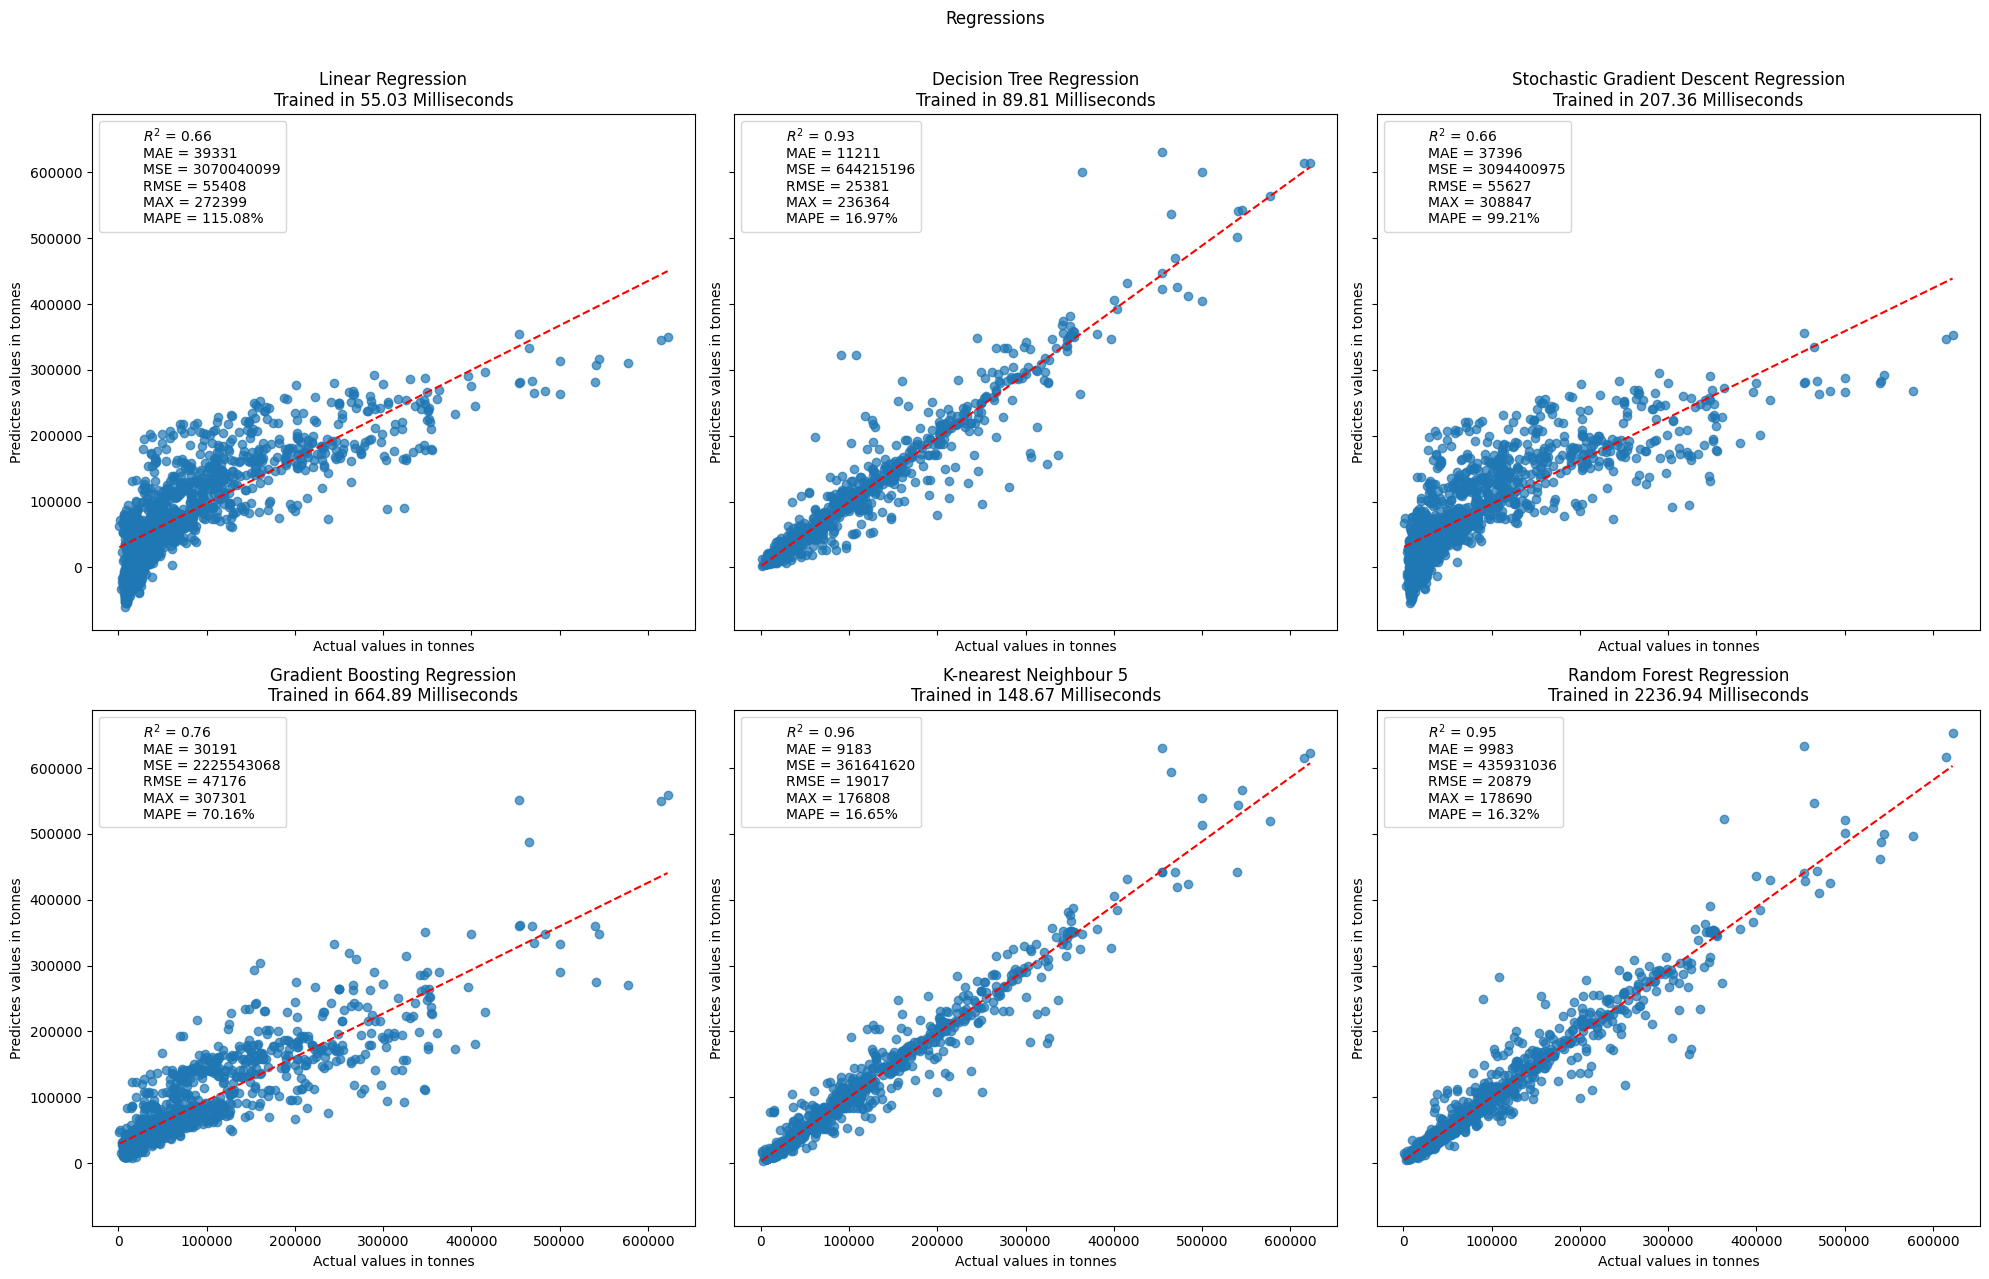

In [191]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, max_error
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import cross_validate, cross_val_predict
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor

import time
from scipy.stats import linregress

lin = LinearRegression()
dtr = DecisionTreeRegressor()
sgd = SGDRegressor(loss='squared_error')
gbr = GradientBoostingRegressor()
knn = KNeighborsRegressor(n_neighbors=5)
rfr = RandomForestRegressor()

# Verwendete Regressionen
estimators = [('Linear Regression', lin),
              ('Decision Tree Regression', dtr),
              ('Stochastic Gradient Descent Regression', sgd),
              ('Gradient Boosting Regression', gbr),
              ('K-nearest Neighbour 5', knn),
              ('Random Forest Regression', rfr)]

# Festlegen des Subplots
fig, axs = plt.subplots(nrows=2, ncols=3, sharex=True, sharey=True, figsize=(20, 13))
axs = np.ravel(axs)

for ax, (name, est) in zip(axs, estimators):
  start_time = time.time()
  # Trainieren des Modelles
  est.fit(X_train, y_train)
  y_pred = est.predict(X_test)
  estimated_time = time.time() - start_time


  # Anzeigen des Modelles
  plot_regression_results(ax, y_test, y_pred, name, estimated_time,
                          (r'$R^2$ = {:.2f}' + '\n' +
                          r'MAE = {:.0f}' + '\n' +
                          r'MSE = {:.0f}' + '\n' +
                          r'RMSE = {:.0f}' + '\n' +
                          r'MAX = {:.0f}' + '\n' +
                          r'MAPE = {:.2f}%')
                          .format(r2_score(y_test, y_pred),
                                  mean_absolute_error(y_test, y_pred),
                                  mean_squared_error(y_test, y_pred),
                                  mean_squared_error(y_test, y_pred, squared=False),
                                  max_error(y_test, y_pred),
                                  mean_absolute_percentage_error(y_test, y_pred)))

plt.suptitle('Regressions')
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

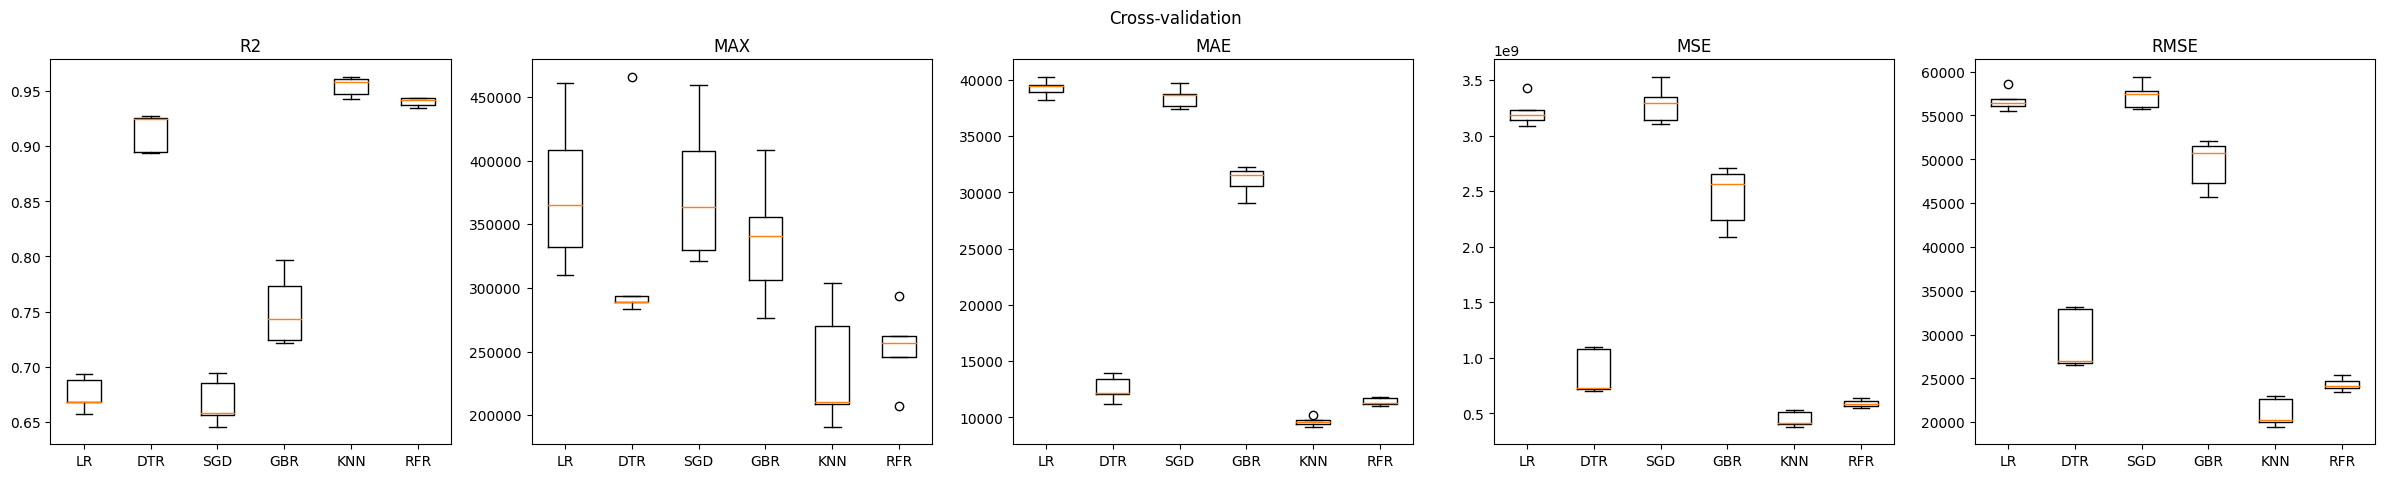

In [192]:
r2_values = []
max_error_values = []
neg_mean_absolute_error_values = []
neg_mean_squared_error_values = []
neg_root_mean_squared_error_values = []

for name, est in estimators:
  # Kreuzvalidierung
  score = cross_validate(est, X_train, y_train, cv=5,
                         scoring=['r2', 'max_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error'],
                         n_jobs=-1)

  # Abspeichern der Werte
  r2_values.append(score['test_r2'])
  max_error_values.append(-score['test_max_error'])
  neg_mean_absolute_error_values.append(-score['test_neg_mean_absolute_error'])
  neg_mean_squared_error_values.append(-score['test_neg_mean_squared_error'])
  neg_root_mean_squared_error_values.append(-score['test_neg_root_mean_squared_error'])

# Plotten der Werte
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(30, 5))

names = ['LR', 'DTR', 'SGD', 'GBR', 'KNN', 'RFR']

axs[0].boxplot(r2_values, labels=names)
axs[0].set_title('R2')
axs[1].boxplot(max_error_values, labels=names)
axs[1].set_title('MAX')
axs[2].boxplot(neg_mean_absolute_error_values, labels=names)
axs[2].set_title('MAE')
axs[3].boxplot(neg_mean_squared_error_values, labels=names)
axs[3].set_title('MSE')
axs[4].boxplot(neg_root_mean_squared_error_values, labels=names)
axs[4].set_title('RMSE')

plt.suptitle('Cross-validation')
plt.show()

In [183]:
regression = 5

print(u'R²: {:.3f} \u00B1 {:.3f}'.format(np.mean(r2_values[regression]), np.std(r2_values[regression])))
print(u'MAX: {:,.0f} \u00B1 {:,.0f}'.format(np.mean(max_error_values[regression]), np.std(max_error_values[regression])))
print(u'MAE: {:,.0f} \u00B1 {:,.0f}'.format(np.mean(neg_mean_absolute_error_values[regression]), np.std(neg_mean_absolute_error_values[regression])))
print(u'MSE: {:,.0f} \u00B1 {:,.0f}'.format(np.mean(neg_mean_squared_error_values[regression]), np.std(neg_mean_squared_error_values[regression])))
print(u'RMSE: {:,.0f} \u00B1 {:,.0f}'.format(np.mean(neg_root_mean_squared_error_values[regression]), np.std(neg_root_mean_squared_error_values[regression])))

R²: 0.939 ± 0.004
MAX: 260,879 ± 26,928
MAE: 11,441 ± 256
MSE: 603,817,360 ± 34,162,529
RMSE: 24,563 ± 692


In [184]:
from sklearn.tree import export_graphviz
import pydot

tree = rfr.estimators_[5]

export_graphviz(tree, out_file = 'tree.dot', feature_names = data.columns[:-1], rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')